## Airbnb DC Hosting Helper ##

## 2_data_cleaning ##

### Summary ###

In this notebook, I will clean and prepare the listing data for further modeling. I will merge the neighborhood venue data collected from the Foursquare API with the Airbnb listing data. Then, I will create the target variable, popularity, based on number of reviews and overall rating. Finally, I will clean the rest of the data for any outliers, convert any values or columns to the correct values, and drop unnecessary columns. This cleaning and preparation will be done for all numerical or categorical data. The text processing for a few fields will be done in the 3_text_processing notebook.

Import libraries and read in data

In [2056]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, requests

In [2204]:
np.random.seed(100)

In [2057]:
pd.set_option('display.max_columns', 300)

In [2058]:
pd.set_option('display.max_rows', 300)

In [2059]:
listings = pd.read_csv('../data/listings.csv.gz')

In [2060]:
neighborhood_venues = pd.read_csv('../data/neighborhood_venues.csv').drop(columns=['Unnamed: 0'])

In [2061]:
reviews = pd.read_csv('../data/reviews.csv.gz')

In [2062]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.0,365.0,NaN,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",NaN,38.90585,-76.94469,Private roo

In [2063]:
neighborhood_venues.head()

,neighbourhood_cleansed,latitude,longitude,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store
0,"Brightwood Park, Crestwood, Petworth",38.946504,-77.024729,1,1,1,3,5,8,48,15,47,10,10
1,"Brookland, Brentwood, Langdon",38.926110,-76.983434,0,0,0,2,6,6,44,22,29,10,8
2,"Capitol Hill, Lincoln Park",38.884692,-76.992667,8,6,2,0,9,13,50,49,46,49,23
3,"Capitol View, Marshall Heights, Benning Heights",38.885287,-76.931463,1,0,1,0,0,4,13,1,15,4,0
4,"Cathedral Heights, McLean Gardens, Glover Park",38.924179,-77.075507,5,0,0,1,4,17,48,27,44,24,2


In [2064]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,3686,150766,2010-12-08,255888,Patrick,"Vita is a very welcoming, helpful and friendly..."
2,3686,177749,2011-02-02,366688,Benjamin,"This was my first time using ""airbnb"" and it m..."
3,3686,197451,2011-03-12,213492,T.J.,"First, Vita saved my work week by providing me..."
4,3686,213212,2011-03-30,428455,Pete & Leila,Great host! Very welcoming and organised. I st...


In [2065]:
listings.shape

(8033, 74)

In [2066]:
neighborhood_venues.shape

(39, 14)

In [2067]:
reviews.shape

(296276, 6)

In [2068]:
neighborhood_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   neighbourhood_cleansed   39 non-null     object 
 1   latitude                 39 non-null     float64
 2   longitude                39 non-null     float64
 3   historic site            39 non-null     int64  
 4   museum                   39 non-null     int64  
 5   metro                    39 non-null     int64  
 6   music venue              39 non-null     int64  
 7   perfomring arts venue    39 non-null     int64  
 8   college and university   39 non-null     int64  
 9   food                     39 non-null     int64  
 10  nightlife spot           39 non-null     int64  
 11  outdoors and recreation  39 non-null     int64  
 12  government building      39 non-null     int64  
 13  clothing store           39 non-null     int64  
dtypes: float64(2), int64(11), ob

In [2069]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296276 entries, 0 to 296275
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     296276 non-null  int64 
 1   id             296276 non-null  int64 
 2   date           296276 non-null  object
 3   reviewer_id    296276 non-null  int64 
 4   reviewer_name  296276 non-null  object
 5   comments       296086 non-null  object
dtypes: int64(3), object(3)
memory usage: 13.6+ MB


Merge neighborhood venue information with listings

In [2070]:
full_listings = listings.merge(neighborhood_venues, on='neighbourhood_cleansed' )

In [2071]:
full_listings.sort_values(by='id', inplace=True)

full_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude_x,longitude_x,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,latitude_y,longitude_y,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,NaN,38.86339,-76.98889,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.0,365.0,NaN,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87,38.863293,-76.984760,1,2,1,0,3,10,25,5,28,21,5
65,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",NaN,38.91195,-77.00456,Private room in townhouse,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22,38.916464,-77.008268,2,2,0,7,12,50,50,45,44,31,13
596,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https:

In [2072]:
full_listings.shape

(8033, 87)

In [2073]:
full_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 2683
Data columns (total 87 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8033 non-null   int64  
 1   listing_url                                   8033 non-null   object 
 2   scrape_id                                     8033 non-null   int64  
 3   last_scraped                                  8033 non-null   object 
 4   name                                          8032 non-null   object 
 5   description                                   7875 non-null   object 
 6   neighborhood_overview                         5144 non-null   object 
 7   picture_url                                   8033 non-null   object 
 8   host_id                                       8033 non-null   int64  
 9   host_url                                      8033 non-null   o

Drop unnecessary columns from first looking at data. I will be using the overall rating column so am dropping the other subcategory columns for rating.

In [2074]:
full_listings.drop(columns=[
    'listing_url',
    'scrape_id',
    'last_scraped',
    'picture_url',
    'host_url',
    'host_name',
    'host_thumbnail_url',
    'host_picture_url',
    'neighbourhood',
    'neighbourhood_group_cleansed',
    'latitude_y',
    'longitude_y',
    'calendar_updated',
    'calendar_last_scraped',
    'license',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
], inplace=True)

In [2075]:
full_listings.shape

(8033, 66)

The data exploration below considers if the number of reviews in the last 12 months and getting more inforation on current listings, as they should be prioritized for relevancy.

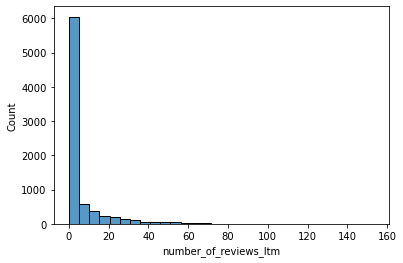

In [2076]:
sns.histplot(full_listings['number_of_reviews_ltm' ], bins=30 );

In [2077]:
len(full_listings[full_listings['number_of_reviews_ltm']>0])

3666

In [2078]:
len(full_listings[full_listings['number_of_reviews_ltm']==0])

4367

There are 3,666 listings that have been reviewed in the past 12 months and 4367 that have not. This shows me that there are lots of listings still up on the site but this is not relevant to users who are looking for active listings. 

In [2079]:
len(full_listings[full_listings['number_of_reviews_ltm']>0])

3666

In [2080]:
full_listings = full_listings[full_listings['number_of_reviews_ltm']>0]

In [2081]:
full_listings.shape

(3666, 66)

I chose to filter the dataset to only contain recent listings. This is defined as a listing having a review in the past 12 months. Although this cut the datset in half, this decision was made to gather the most accurate information on the DC Airbnb market right now. As I am looking to predict the most popular listings on the current market, listings on the site that are not acctive could confuse the predictions and make it less accurate. This is also in line with the way Airbnb shows listings on their site, they prioritize listings with the current reviews from the past year.

The scope of my predictive models will be for hosts on the DC Airbnb market with active listings for the past 12 months.

Now that I have a set of more relevant listings, I will explore ratings and number of reviews below to come up with criteria for the popular target variable below. First, I will look at the overall rating scores.

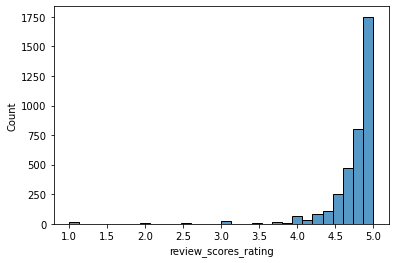

In [2082]:
sns.histplot( full_listings['review_scores_rating'], bins=30);

In [2083]:
full_listings['review_scores_rating'].isnull().sum()

0

There are now no nulls for rating score.

In [2084]:
len(full_listings[full_listings['review_scores_rating']>4])

3508

We see that for the 3,666 airbnbs that are rated, 3,508 airbnbs (96%) have an overall rating above a 4. This shows pretty good quality overall for the DC airbnbs that have been rated.

In [2085]:
full_listings['review_scores_rating'].quantile(.5)

4.85

In [2086]:
full_listings['review_scores_rating'].quantile(.7)

4.94

In [2087]:
len(full_listings[full_listings['review_scores_rating']>=4.85])

1891

In [2088]:
len(full_listings[full_listings['review_scores_rating']>=4.94])

1141

Since the DC airbnbs are all pretty high quality, I will look into different percentiles to see which should be used as a threshhold to help indicate popularity. Aboce, we can see that the 50th percentile has a very high rating of 4.85 and there are 1,891 listings in this category. Also, the 70th percentile of ratings is 4.94 and 1,141 airbnbs are in this category. 

It's clear that to be considered the best in DC, the airbnb needs to meet high rating standards. When thinking of consumers, a 4.85 out of 5 overall rating would indicate high quality and attract guests to want to stay there. To be considered popular in DC, it seems an overall rating close to 4.85 (the 50th percentile) is reasonable, whereas the 4.9 rating may be too high. I will be using a rating hovering around 4.85 as part of the metric to calculate popularity.

Below explores the total number of reviews and how to incorporate this in the popularity target metric.

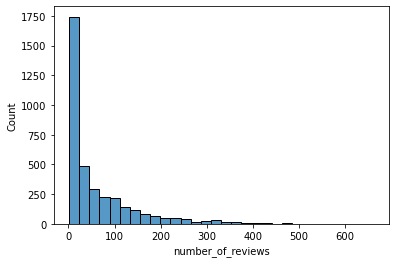

In [2089]:
sns.histplot(full_listings['number_of_reviews' ], bins=30 );

In [2090]:
full_listings['number_of_reviews' ].value_counts()

1      311
2      218
3      140
4      110
5       93
      ... 
472      1
468      1
446      1
442      1
619      1
Name: number_of_reviews, Length: 364, dtype: int64

All listings now have at least one review.

In [2091]:
full_listings['number_of_reviews'].quantile(.3)

8.0

In [2092]:
full_listings['number_of_reviews'].quantile(.7)

70.0

The 30th percentile of number of reviews is 8 and the 70th percentile is 70. There is a large range here.

In [2093]:
len(full_listings[(full_listings['number_of_reviews']>=60) & (full_listings['review_scores_rating']>=4.8) ])

815

There are 815 listings that have a rating of at least 4.8 and 60 or more reviews which I would consider to be the most popular listings in the dataset. I chose this criteria based off of the percentile information in my data exploration and just rounded to cutoff numbers that make sense. I also wanted to keep in all information for listings that did not have reivews or ratings yet since this will influence the popularity of the listing.

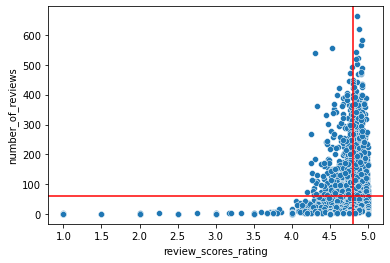

In [2094]:
sns.scatterplot(x = 'review_scores_rating', y='number_of_reviews', data=full_listings);
plt.axhline(60, color='r');
plt.axvline(4.8, color='r');

The graph above helps visualize the relationship of number of reviews to the rating. We can see that the ratings congregate above 4, but there is a increasing relationship between number of reviews and highest ratings and shows popularity. The horizontal and vertical red lines show where the cut offs are for our 'popular' criteria. I am looking to predict whether or not the listing will show up in the top right quandrant of the graph and looking to understand what features make this possible.

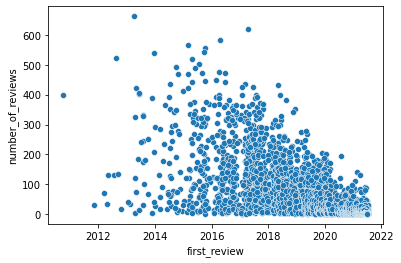

In [2095]:
sns.scatterplot(x = pd.to_datetime(full_listings['first_review']), y='number_of_reviews', data=full_listings);

This graph above shows the number of total reviews in relation to the date of the first review. It makes sense that listings with a older first review date now have a greater total number of listings. However, any listing with over 60 reviews will be considered popular. 60 or more reviews would be realistic even if a host started in the last 12 months or has rented for multiple years.

After my data exploration as to what makes a listing the most popular, I am going to create the target variable, popularity, to incdicate whether a listing is considered popluar on the market or not. From my data exploration, I have concluded that to be considered popular on the dc market right now, a listing should have at least 60 total reviews and a rating of at least 4.8.

In [2096]:
len(full_listings[(full_listings['number_of_reviews']>=60) & 
                  (full_listings['review_scores_rating']>=4.8)])

815

815 out of 3,666 listings (22%) meet the criteria for 'popular' listed above. 

In [2097]:
full_listings['popular']  = np.where((full_listings['number_of_reviews']>=60) & 
                                     (full_listings['review_scores_rating']>=4.8), 1, 0)

In [2098]:
full_listings.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude_x,longitude_x,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store,popular
0,3686,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,4645,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,Anacostia,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86339,-76.98889,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.0,365.0,t,1,31,61,336,75,3,0,2014-06-22,2021-01-12,4.59,f,2,0,2,0,0.87,1,2,1,0,3,10,25,5,28,21,5,0
1173,7103,"Best of Washington - Great neighborhood, parking",Private guest suite with cathedral ceiling sur...,"IDEAL AND IDYLLIC LOCATION:<br />• Quiet, safe...",17633,2009-05-18,"Washington, District of Columbia, United States","My business is LUXbnb, we offer short-stay fur...",within an hour,100%,93%,f,Berkley,48.0,48.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Spring Valley, Palisades, Wesley Heights, Foxh...",38.91999,-77.09774,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Cooking basics"", ""First aid kit"", ""Lockbox"",...",$97.00,7,200,7,7,1125,1125,7.0,1125.0,t,9,20,50,140,90,2,1,2016-04-16,2021-06-25,4.80,f,43,43,0,0,1.41,2,1,0,0,1,40,18,4,29,6,0,1
1253,9641,Sophisticated Logan Circle Loft,"Stay in or go out. Either way, you'll enjoy th...","Logan Circle is a historic, residential neighb...",32067,2009-08-17,"Washington D.C., District of Columbia, United ...",A former technology executive and entrepreneur...,within a day,100%,35%,f,Logan Circle,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Dupont Circle, Connecticut Avenue/K Street",38.90927,-77.03471,Entire loft,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",$185.00,2,180,2,2,180,180,2.0,180.0,t,17,47,76,76,155,2,1,2015-06-10,2021-06-22,4.75,f,2,1,0,1,2.09,36,28,2,15,46,44,50,50,45,48,47,0
1902,11785,Sanctuary near Cathedral,<b>The space</b><br />An English basement like...,Our neighborhood is informally known as Cathed...,32015,2009-08-16,"Washington, D.C., District of Columbia, United...",I am a somewhat gregarious middle-aged PhD/JD ...,within an hour,100%,100%,f,Cathedral Heights,4.0,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Cathedral Heights, McLean Gardens, Glover Park",38.92622,-77.07591,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Cooking basics"", ""Dedicated workspace"", ""Lon...",$125.00,1,365,1,1,1125,1125,1.0,1125.0,t,12,42,72,347,400,12,2,2010-10-08,2021-06-18,4.59,t,4,1,3,0,3.05,5,0,0,1,4,17,48,27,44,24,2,0
1903,12442,Peaches & Cream near Cathedral,<b>The space</b><br />Life as it was in days g...,There is so much to love in Cathedral Heights!...,32015,2009-08-16,"Washington, D.C., Distric

In [2099]:
full_listings['popular'].value_counts(normalize=True)

0    0.777687
1    0.222313
Name: popular, dtype: float64

I added the popular target column to the dataset based on the criteria descirbed above. 

Just a note here that popularity metric is not a perfect metric because longer stays will have fewer reviews. This is a limitation of this metric. However, according to [IPropertyManagement](https://ipropertymanagement.com/research/airbnb-statistics), a site that has conducted research on Airbnb listings worldwide, the average stay in an Airbnb is 4.3 nights. The popularity metric should be representative of the average stay in DC.

Below, I will perform data cleaning on the other variables in the dataset. First, I will drop more unnecessary columns and any variables related to the target variable to prevent data leakage.

In [2100]:
full_listings.drop(columns = ['host_location',
                              'host_neighbourhood',
                              'host_listings_count',
                              'reviews_per_month',
                              'number_of_reviews_l30d',
                              'number_of_reviews',
                              'number_of_reviews_ltm',
                              'review_scores_rating'
                             ], inplace=True)

In [2101]:
full_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3666 entries, 0 to 824
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3666 non-null   int64  
 1   name                                          3666 non-null   object 
 2   description                                   3621 non-null   object 
 3   neighborhood_overview                         2798 non-null   object 
 4   host_id                                       3666 non-null   int64  
 5   host_since                                    3656 non-null   object 
 6   host_about                                    2542 non-null   object 
 7   host_response_time                            3351 non-null   object 
 8   host_response_rate                            3351 non-null   object 
 9   host_acceptance_rate                          3519 non-null   ob

The next thing I will look into below is the availability categories to see if further data cleaning is required.

In [2102]:
test = full_listings[(full_listings['availability_365']==0)&
                    (full_listings['availability_30']==0) &
                     (full_listings['availability_60']==0) &
                     (full_listings['availability_90']==0) ]

test.head(100)

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude_x,longitude_x,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,first_review,last_review,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store,popular
1174,298346,Sunny Spacious 1 Bdrm+Study Garden Apt,This charming one bedrm garden apt with wonder...,The Palisades neighborhood is like a village w...,743745,2011-06-25,I am an intellectually curious and gregarious ...,within an hour,100%,78%,f,3.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Spring Valley, Palisades, Wesley Heights, Foxh...",38.92306,-77.10052,Entire house,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Cooking basics"", ""Dedicated workspace"", ""Lon...",$125.00,7,90,7,7,1125,1125,7.0,1125.0,t,0,0,0,0,2017-01-24,2021-06-14,t,1,1,0,0,2,1,0,0,1,40,18,4,29,6,0,0
1263,563607,Boutique Dupont Apartment with in unit W/D,Renovated fully furnished bright studio apartm...,NaN,2771266,2012-06-28,I want you to enjoy all the culture [Location]...,within an hour,100%,100%,f,0.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Dupont Circle, Connecticut Avenue/K Street",38.91564,-77.03796,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Cooking basics"", ""Dedicated workspace"", ""Keu...",$65.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,0,2016-07-03,2021-05-19,t,1,1,0,0,36,28,2,15,46,44,50,50,45,48,47,0
2011,1284169,"Bright, Beautiful, Steps to Metro",Columbia Heights high ceiling bright Victorian...,The historic & beautifully renovated Tivoli Th...,3393172,2012-08-27,Greetings! \r\n\r\nI have lived most of my ...,within a few hours,100%,100%,t,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.92783,-77.03096,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",$100.00,28,365,28,28,365,365,28.0,365.0,t,0,0,0,0,2015-07-25,2021-06-12,f,2,2,0,0,7,2,3,22,23,50,50,50,46,39,29,1
2012,1294300,Spacious 1-bedroom apt. with off-street parking,This is a comfortable and welcoming English ba...,Mt. Pleasant gives you the best of all worlds:...,7037040,2013-06-21,My wife and I have have lived in Washington DC...,NaN,NaN,75%,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93196,-77.04314,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",$99.00,2,14,2,2,1125,1125,2.0,1125.0,t,0,0,0,0,2017-10-02,2020-07-19,t,1,1,0,0,7,2,3,22,23,50,50,50,46,39,29,1
2018,1537822,Park View Apt: parking | kitchen | wifi | garden,Please check DC travel advisory before decidin...,"Park View is a neighborhood in central DC, imm...",8199495,2013-08-16,I love traveling and exploring new places. I p...,within an hour,100%,92%,t,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93362,-77.02555,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$84.00,2,10,2,2,1125,1125,2.0,1125.0,t,0,0,0,0,2019-04-22,2021-05-09,t,2,2,0,0,7,2,3,22,23,50,50,50,46,39,29,1
2019,1628600,Spacious 2 BR Rowhouse for Tourists or City Li...,This Colu

In [2103]:
test.shape

(287, 59)

In [2104]:
full_listings[full_listings['has_availability']=='f']

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude_x,longitude_x,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,first_review,last_review,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store,popular
2066,7679092,Bright & Cozy 1 BR DC Condo,Top (4th) floor of a quiet walk-up (no elevato...,"La Caprice, a delightful Parisian bakery is ju...",11839900,2014-02-01,"We love to travel, try new things, and meet ne...",NaN,NaN,75%,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93453,-77.03515,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""First aid kit"", ""Dedicated workspace"", ""Kitc...",$111.00,3,1125,3,3,1125,1125,3.0,1125.0,f,0,0,0,0,2015-10-11,2020-08-29,f,1,1,0,0,7,2,3,22,23,50,50,50,46,39,29,0
7508,37120385,Hip & Luxurious Apartment on Connecticut Avenue,This is the place you want - not the place you...,Quiet neighborhood with amazing treasures with...,227002039,2018-11-22,"Journalist, Documentary Filmmaker and most imp...",NaN,NaN,75%,f,1.0,"['email', 'phone', 'offline_government_id', 's...",t,t,"Hawthorne, Barnaby Woods, Chevy Chase",38.95968,-77.07224,Entire apartment,Entire home/apt,4,NaN,1.5 baths,2.0,3.0,"[""Elevator"", ""Hot water"", ""Dedicated workspace...",$155.00,3,1125,3,3,1125,1125,3.0,1125.0,f,0,0,0,0,2020-07-25,2020-09-16,f,1,1,0,0,2,0,0,1,1,2,24,4,21,2,6,0
1819,48017228,Gorgeous Townhouse in the Heart of Logan Circle,NaN,NaN,94211763,2016-09-08,Mid-30s government lawyers. I’ve been in DC te...,NaN,NaN,100%,f,1.0,"['phone', 'facebook']",t,f,"Dupont Circle, Connecticut Avenue/K Street",38.91397,-77.03492,Entire townhouse,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Shampoo"", ""Hot water"", ""Kitchen"", ""Carbon mo...",$400.00,2,60,2,2,1125,1125,2.0,1125.0,f,0,0,0,0,2021-02-15,2021-02-21,f,1,1,0,0,36,28,2,15,46,44,50,50,45,48,47,0


In [2105]:
full_listings = full_listings[full_listings['has_availability']=='t']

In [2106]:
full_listings.shape

(3663, 59)

There are 287 airbnb listings that do not show any availability in the coming 30, 60, 90, or 365 days. However, upon further research it seems that these can be current listings on the site and hosts just may not extend the caneldar that far in the future. I will leave these in the dataset as is after confirming the accuracy. Below, I will remove the 3 listings that actually do not have any availability at any point in time.

Below, I will change all date columns to the datetime format. Then I will create a column to note the current day of the pull and convert the other datetimes to number of days based on this information.

In [2107]:
full_listings['current_day'] = pd.to_datetime(['2021-07-11']*full_listings.shape[0])

In [2108]:
full_listings['host_since'] = pd.to_datetime(full_listings['host_since'])

full_listings['first_review'] = pd.to_datetime(full_listings['first_review'])

full_listings['last_review'] = pd.to_datetime(full_listings['last_review'])

In [2109]:
full_listings['days_being_host'] = full_listings['current_day'] - full_listings['host_since'] 

full_listings['days_since_first_review'] = full_listings['current_day'] - full_listings['first_review'] 

full_listings['days_since_last_review'] = full_listings['current_day'] - full_listings['last_review'] 

In [2110]:
full_listings.head()

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude_x,longitude_x,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,first_review,last_review,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store,popular,current_day,days_being_host,days_since_first_review,days_since_last_review
0,3686,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,4645,2008-11-26,"I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86339,-76.98889,Private room in house,Private room,1,NaN,1 private bath,1.0,1.0,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.0,365.0,t,1,31,61,336,2014-06-22,2021-01-12,f,2,0,2,0,1,2,1,0,3,10,25,5,28,21,5,0,2021-07-11,4610 days,2576 days,180 days
1173,7103,"Best of Washington - Great neighborhood, parking",Private guest suite with cathedral ceiling sur...,"IDEAL AND IDYLLIC LOCATION:<br />• Quiet, safe...",17633,2009-05-18,"My business is LUXbnb, we offer short-stay fur...",within an hour,100%,93%,f,48.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Spring Valley, Palisades, Wesley Heights, Foxh...",38.91999,-77.09774,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Cooking basics"", ""First aid kit"", ""Lockbox"",...",$97.00,7,200,7,7,1125,1125,7.0,1125.0,t,9,20,50,140,2016-04-16,2021-06-25,f,43,43,0,0,2,1,0,0,1,40,18,4,29,6,0,1,2021-07-11,4437 days,1912 days,16 days
1253,9641,Sophisticated Logan Circle Loft,"Stay in or go out. Either way, you'll enjoy th...","Logan Circle is a historic, residential neighb...",32067,2009-08-17,A former technology executive and entrepreneur...,within a day,100%,35%,f,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Dupont Circle, Connecticut Avenue/K Street",38.90927,-77.03471,Entire loft,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",$185.00,2,180,2,2,180,180,2.0,180.0,t,17,47,76,76,2015-06-10,2021-06-22,f,2,1,0,1,36,28,2,15,46,44,50,50,45,48,47,0,2021-07-11,4346 days,2223 days,19 days
1902,11785,Sanctuary near Cathedral,<b>The space</b><br />An English basement like...,Our neighborhood is informally known as Cathed...,32015,2009-08-16,I am a somewhat gregarious middle-aged PhD/JD ...,within an hour,100%,100%,f,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Cathedral Heights, McLean Gardens, Glover Park",38.92622,-77.07591,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Cooking basics"", ""Dedicated workspace"", ""Lon...",$125.00,1,365,1,1,1125,1125,1.0,1125.0,t,12,42,72,347,2010-10-08,2021-06-18,t,4,1,3,0,5,0,0,1,4,17,48,27,44,24,2,0,2021-07-11,4347 days,3929 days,23 days
1903,12442,Peaches & Cream near Cathedral,<b>The space</b><br />Life as it was in days g...,There is so much to love in Cathedral Heights!...,32015,2009-08-16,I am a somewhat gregarious middle-aged PhD/JD ...,within an hour,100%,100%,f,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Cathedral Heights, McLean Gardens, Glover Park",38.92756,-77.07667,Private room in house,Private room,2,NaN,1.5 shared baths,1.0,1.0,"[""Cooking basics"", ""Dedicated 

In [2111]:
full_listings['days_since_last_review'].isnull().sum()

0

In [2112]:
full_listings['days_since_first_review'].isnull().sum()

0

In [2113]:
full_listings['host_since'].isnull().sum()

10

In [2114]:
full_listings[full_listings['host_since'].isnull()==True]

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude_x,longitude_x,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,first_review,last_review,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store,popular,current_day,days_being_host,days_since_first_review,days_since_last_review
4133,46670154,Pleasant Double Bed At Good Location,The building in Washington DC is located in th...,NaN,175128252,NaT,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Southwest Employment Area, Southwest/Waterfron...",38.88196,-77.01913,Private room in bed and breakfast,Private room,2,NaN,1 private bath,1.0,1.0,"[""Cable TV"", ""Hot water"", ""Bathtub"", ""TV with ...","$1,666.00",1,365,1,1,365,365,1.0,365.0,t,0,0,0,274,2020-12-06,2020-12-06,t,136,0,136,0,6,1,2,5,7,11,50,50,46,48,5,0,2021-07-11,NaT,217 days,217 days
6254,46673394,Cool Double Bed At Good Location,The following services and amenities are avail...,NaN,175128252,NaT,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90012,-77.03295,Private room in bed and breakfast,Private room,2,NaN,1 private bath,1.0,1.0,"[""Elevator"", ""Cable TV"", ""Hot water"", ""Bathtub...",$264.00,1,365,1,1,365,365,1.0,365.0,t,28,57,87,362,2021-03-21,2021-05-01,t,136,0,136,0,42,48,8,16,37,42,50,50,48,50,49,0,2021-07-11,NaT,112 days,71 days
4136,46673423,Exquisite Room Standard At Good Location,"This building enjoys a convenient, central loc...",NaN,175128252,NaT,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Southwest Employment Area, Southwest/Waterfron...",38.88644,-77.01882,Private room in bed and breakfast,Private room,2,NaN,1 private bath,1.0,1.0,"[""Elevator"", ""Hot water"", ""Bathtub"", ""Long ter...","$1,891.00",1,365,1,1,365,365,1.0,365.0,t,0,0,0,274,2021-02-14,2021-02-14,t,136,0,136,0,6,1,2,5,7,11,50,50,46,48,5,0,2021-07-11,NaT,147 days,147 days
1778,46674977,Spacious Double Deluxe At Good Location,The building is perfectly located for a visit ...,NaN,175128252,NaT,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Dupont Circle, Connecticut Avenue/K Street",38.90847,-77.03668,Room in hotel,Private room,2,NaN,1 private bath,1.0,1.0,"[""Elevator"", ""Cable TV"", ""Hot water"", ""Bathtub...",$701.00,1,365,1,1,365,365,1.0,365.0,t,0,0,0,273,2021-01-01,2021-01-01,t,136,0,136,0,36,28,2,15,46,44,50,50,45,48,47,0,2021-07-11,NaT,191 days,191 days
6270,46675390,Family Double Deluxe At Good Location,A modern masterpiece of lodging and lifestyle ...,NaN,175128252,NaT,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.89539,-77.00950,Private room in bed and breakfast,Private room,2,NaN,1 private bath,1.0,1.0,"[""Cable TV"", ""Hot water"", ""TV with standard ca...","$1,891.00",1,365,1,1,365,365,1.0,365.0,t,0,0,0,274,2021-01-10,2021-01-10,t,136,0,136,0,42,48,8,16,37,42,50,50,48,50,49,0,2021-07-11,NaT,182 days,182 days
3874,46675445,En-Suite Double Standard At Good Location,The following services and amenities are avail...,NaN,175128252,NaT,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Union Station, Stanton Park, Kingman Park",38.90558,-77.00702,Private room in bed and breakfast,Private room,2,NaN,1 private bath,1.0,1.0,"[""Cable TV"", ""Hot water"", ""TV with standard ca...","$1,644.00",1,365,

In [2115]:
full_listings = full_listings[full_listings['host_since'].isnull()==False]

I decided to drop the columns above that had null information on the hosts because we will want to include this information in modeling. Also, it was a very small portion (10 entries) that did not have this information and the majority of entries do.

Below, I will check for any entries that have been duplicated to make sure the data is the most clean.

In [2116]:
dupes = full_listings[full_listings.duplicated(subset=['host_id', 'description', 'name'])==True]

In [2117]:
dupes.shape

(29, 63)

In [2118]:
dupes.sort_values('name')

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude_x,longitude_x,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,first_review,last_review,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store,popular,current_day,days_being_host,days_since_first_review,days_since_last_review
1725,46120474,1 MONTH & LONGER Stays -Entire Apt in Adams Mo...,Stay in the heart of the Nation's Capitol - Ad...,You'll rarely need to leave the neighborhood f...,69203193,2016-04-27,Please come and stay at one of our Airbnbs loc...,within an hour,98%,84%,f,32.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Dupont Circle, Connecticut Avenue/K Street",38.91802,-77.03662,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",$80.00,30,1125,30,30,1125,1125,30.0,1125.0,t,0,12,42,317,2020-12-05,2020-12-05,f,30,30,0,0,36,28,2,15,46,44,50,50,45,48,47,0,2021-07-11,1901 days,218 days,218 days
1694,43767660,2BR Platinum Suite/Walk to White House Nat'l Mall,"These generous, renovated and upgraded fully a...","Area attractions include the White House, the ...",176970521,2018-03-06,NaN,within an hour,100%,100%,t,6.0,"['email', 'phone']",t,t,"Dupont Circle, Connecticut Avenue/K Street",38.89901,-77.03949,Entire serviced apartment,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$225.00,1,1125,25,25,1125,1125,25.0,1125.0,t,19,48,78,352,2020-10-27,2021-07-05,t,8,2,4,0,36,28,2,15,46,44,50,50,45,48,47,0,2021-07-11,1223 days,257 days,6 days
3130,47196271,BLACK SWAN | 14th & R | Executive Flat,Our suites are ideal spaces for up to 3 people...,Few DC neighborhoods are as inspiring as the o...,127034950,2017-04-22,NaN,within an hour,100%,99%,f,27.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Shaw, Logan Circle",38.91394,-77.03064,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Keypad"", ""Long term s...",$138.00,2,365,1,3,365,365,2.2,365.0,t,8,38,68,252,2021-05-08,2021-05-14,t,9,9,0,0,31,28,5,24,38,46,50,50,44,47,48,0,2021-07-11,1541 days,64 days,58 days
3081,44666220,BLACK SWAN | 14th & R | Executive Flat,Our suites are ideal spaces for up to 3 people...,Few DC neighborhoods are as inspiring as the o...,127034950,2017-04-22,NaN,within an hour,100%,99%,f,27.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Shaw, Logan Circle",38.91313,-77.03029,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Keypad"", ""Long term s...",$131.00,2,365,1,3,365,365,2.2,365.0,t,10,40,70,254,2020-08-17,2021-03-27,t,9,9,0,0,31,28,5,24,38,46,50,50,44,47,48,0,2021-07-11,1541 days,328 days,106 days
3082,44666226,BLACK SWAN | 14th & R | Executive Flat,Our suites are ideal spaces for up to 3 people...,Few DC neighborhoods are as inspiring as the o...,127034950,2017-04-22,NaN,within an hour,100%,99%,f,27.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Shaw, Logan Circle",38.91194,-77.03018,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Dedicated workspace"", ""Long term stays allow...",$133.00,2,365,1,3,365,365,2.2,365.0,t,3,33,63,247,2021-03-28,2021-05-30,t,9,9,0,0,31,28,5,24,38,46,50,50,44,47,4

It appears as though there are a few hosts that have similar names and descriptions for thier properites, however there are no exact duplicates that need to be removed.

Next I will check for more fields with nulls and how to correct this.

In [2119]:
full_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 824
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   id                                            3653 non-null   int64          
 1   name                                          3653 non-null   object         
 2   description                                   3609 non-null   object         
 3   neighborhood_overview                         2796 non-null   object         
 4   host_id                                       3653 non-null   int64          
 5   host_since                                    3653 non-null   datetime64[ns] 
 6   host_about                                    2539 non-null   object         
 7   host_response_time                            3351 non-null   object         
 8   host_response_rate                            3351 non-null

In [2120]:
full_listings['host_response_time'].value_counts()

within an hour        2641
within a few hours     422
within a day           250
a few days or more      38
Name: host_response_time, dtype: int64

In [2121]:
full_listings['host_response_time'].isna().sum()

302

In [2122]:
full_listings['host_response_time'] = full_listings['host_response_time'].fillna('unknown')

In [2123]:
full_listings['host_response_rate'] = full_listings['host_response_rate'].str.replace('%','')

In [2124]:
#find mean response rate for non-nulls

full_listings[full_listings['host_response_rate'].isna()==False]['host_response_rate'].astype(int).mean()

96.67949865711728

In [2125]:
full_listings['host_response_rate'].isna().sum()

302

In [2126]:
full_listings['host_response_rate'] = full_listings['host_response_rate'].fillna('96')

In [2127]:
full_listings['host_response_rate'] = full_listings['host_response_rate'].astype(int)/100

In [2128]:
full_listings['host_acceptance_rate'].value_counts()

100%    1064
99%      338
98%      286
97%      168
92%      129
96%      117
93%      109
94%      109
95%       96
88%       72
89%       64
85%       63
84%       57
86%       56
90%       55
83%       50
91%       49
87%       48
80%       48
75%       40
50%       38
57%       28
77%       25
67%       25
79%       24
71%       20
82%       20
81%       18
78%       18
63%       17
56%       16
73%       15
60%       15
33%       12
69%       12
74%       11
70%       10
64%        9
47%        8
61%        8
40%        8
29%        8
58%        8
48%        8
62%        7
76%        7
25%        7
65%        7
68%        6
38%        6
43%        6
55%        6
0%         4
72%        4
27%        4
53%        4
54%        4
31%        4
66%        4
35%        3
45%        3
39%        3
59%        3
42%        2
20%        2
17%        2
37%        2
22%        2
30%        2
12%        1
24%        1
52%        1
28%        1
49%        1
18%        1
46%        1
32%        1

In [2129]:
full_listings['host_acceptance_rate'].isna().sum()

137

In [2130]:
full_listings['host_acceptance_rate'] = full_listings['host_acceptance_rate'].str.replace('%','')

In [2131]:
#find mean acceptance rate for non-nulls

full_listings[full_listings['host_acceptance_rate'].isna()==False]['host_acceptance_rate'].astype(int).mean()

90.45904436860069

In [2132]:
full_listings['host_acceptance_rate'] = full_listings['host_acceptance_rate'].fillna('90')

In [2133]:
full_listings['host_acceptance_rate'] = full_listings['host_acceptance_rate'].astype(int)/100

I changed response time and rate columns and filled n/a values with unknown or category mean as needed.

In [2135]:
full_listings['host_is_superhost'].value_counts()

f    2119
t    1534
Name: host_is_superhost, dtype: int64

In [2136]:
full_listings['host_is_superhost'] = full_listings['host_is_superhost'].map({'f': 0, 't': 1})

Created binary variable instead of t or f for superhost.

In [2137]:
full_listings['host_verifications']

C:\Users\rgf60\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0       ['email', 'phone', 'reviews', 'jumio', 'offlin...
1173    ['email', 'phone', 'reviews', 'offline_governm...
1253    ['email', 'phone', 'facebook', 'reviews', 'off...
1902                 ['email', 'phone', 'reviews', 'kba']
1903                 ['email', 'phone', 'reviews', 'kba']
                              ...                        
588     ['email', 'phone', 'jumio', 'offline_governmen...
589     ['email', 'phone', 'reviews', 'jumio', 'govern...
2675    ['email', 'phone', 'reviews', 'offline_governm...
7047                                   ['email', 'phone']
824     ['phone', 'offline_government_id', 'selfie', '...
Name: host_verifications, Length: 3653, dtype: object

In [2138]:
full_listings.drop(columns=['host_verifications'], inplace=True)

In [2139]:
full_listings['host_identity_verified'].value_counts()

t    3041
f     612
Name: host_identity_verified, dtype: int64

In [2140]:
full_listings['host_identity_verified'] = full_listings['host_identity_verified'].map({'f': 0, 't': 1})

In [2141]:
full_listings['host_has_profile_pic'].value_counts()

t    3647
f       6
Name: host_has_profile_pic, dtype: int64

In [2142]:
full_listings['host_has_profile_pic'] = full_listings['host_has_profile_pic'].map({'f': 0, 't': 1})

Above, I converted more columns to binary instead of t or f. I also dropped the type of host verifications since I think the binary option should sufficient information for the model.

In [2143]:
full_listings['neighbourhood_cleansed'].value_counts()

Capitol Hill, Lincoln Park                                                                           414
Union Station, Stanton Park, Kingman Park                                                            372
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           319
Shaw, Logan Circle                                                                                   293
Dupont Circle, Connecticut Avenue/K Street                                                           280
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    260
Brightwood Park, Crestwood, Petworth                                                                 198
West End, Foggy Bottom, GWU                                                                          138
Kalorama Heights, Adams Morgan, Lanier Heights                                                       131
Howard University, Le Droit Park, Cardozo/Shaw         

The above print out shows the frequency of listings in each DC neighborhood. The difference between the most listings and least is large!

In [2144]:
full_listings['property_type'].value_counts()

Entire apartment                     1477
Entire townhouse                      376
Entire house                          356
Entire guest suite                    335
Entire condominium                    221
Private room in house                 206
Private room in townhouse             177
Entire serviced apartment             125
Private room in apartment              89
Room in hotel                          49
Room in boutique hotel                 39
Entire guesthouse                      30
Private room in condominium            29
Entire loft                            27
Private room in guest suite            16
Shared room in apartment               16
Shared room in hostel                  12
Private room in bed and breakfast       9
Room in hostel                          7
Shared room in townhouse                7
Room in bed and breakfast               6
Private room in guesthouse              6
Shared room in house                    5
Entire bungalow                   

In [2145]:
full_listings.drop(columns=['property_type'], inplace=True)

In [2146]:
full_listings['room_type'].value_counts()

Entire home/apt    2963
Private room        625
Shared room          47
Hotel room           18
Name: room_type, dtype: int64

Property type was droped because room type is a cleaned up version.

In [2147]:
full_listings['accommodates'].value_counts()

2     1111
4      954
3      413
6      408
5      239
1      195
8      128
10      56
7       49
12      42
9       18
16      17
14       9
11       8
13       4
0        1
15       1
Name: accommodates, dtype: int64

In [2148]:
full_listings['accommodates'] = np.where(full_listings['accommodates']==0,1,full_listings['accommodates'])

Correcting data for value counts for accomodates

In [2149]:
full_listings.drop(columns=['bathrooms'], inplace=True)

In [2150]:
full_listings['bathrooms_text'].value_counts().sort_values()

Half-bath              1
0 baths                1
Shared half-bath       1
0 shared baths         1
5 baths                1
5.5 shared baths       2
6 baths                2
6.5 baths              2
3.5 shared baths       2
11 shared baths        2
3 shared baths         2
5.5 baths              2
4.5 baths             13
2.5 shared baths      17
4 baths               22
2 shared baths        54
1.5 shared baths      60
3 baths               61
3.5 baths             64
1.5 baths            184
2.5 baths            195
1 shared bath        201
1 private bath       249
2 baths              314
1 bath              2198
Name: bathrooms_text, dtype: int64

In [2151]:
full_listings['bathrooms_text'] = full_listings['bathrooms_text'].str.split(' ').str[0]

In [2152]:
full_listings['bathrooms_text'].value_counts()

1            2648
2             368
1.5           244
2.5           212
3.5            66
3              63
4              22
4.5            13
5.5             4
11              2
6               2
0               2
6.5             2
5               1
Shared          1
Half-bath       1
Name: bathrooms_text, dtype: int64

In [2153]:
full_listings['bathrooms_text'] = full_listings['bathrooms_text'].str.replace('Shared', '1')

full_listings['bathrooms_text'] = full_listings['bathrooms_text'].str.replace('Half-bath', '.5')

In [2154]:
full_listings['bathrooms_text'] = full_listings['bathrooms_text'].astype(float)

In [2155]:
full_listings['bathrooms_text'].value_counts()

1.0     2649
2.0      368
1.5      244
2.5      212
3.5       66
3.0       63
4.0       22
4.5       13
5.5        4
0.0        2
6.0        2
11.0       2
6.5        2
5.0        1
0.5        1
Name: bathrooms_text, dtype: int64

In [2156]:
full_listings[full_listings['bathrooms_text'].isna()==True]['bathrooms_text']

1255   NaN
4548   NaN
Name: bathrooms_text, dtype: float64

In [2157]:
full_listings['bathrooms_text'] = full_listings['bathrooms_text'].fillna(1)

In [2158]:
full_listings.rename(columns={'bathrooms_text' : 'bathrooms'}, inplace=True)

Number of bathrooms in text form was converted to float above.

In [2159]:
full_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 824
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   id                                            3653 non-null   int64          
 1   name                                          3653 non-null   object         
 2   description                                   3609 non-null   object         
 3   neighborhood_overview                         2796 non-null   object         
 4   host_id                                       3653 non-null   int64          
 5   host_since                                    3653 non-null   datetime64[ns] 
 6   host_about                                    2539 non-null   object         
 7   host_response_time                            3653 non-null   object         
 8   host_response_rate                            3653 non-null

In [2160]:
full_listings['bedrooms'].value_counts()

1.0    2053
2.0     730
3.0     267
4.0     120
5.0      41
6.0      15
7.0       5
9.0       1
8.0       1
Name: bedrooms, dtype: int64

In [2161]:
full_listings[full_listings['bedrooms'].isna()==True]['room_type'].value_counts()

Entire home/apt    365
Private room        54
Hotel room           1
Name: room_type, dtype: int64

In [2162]:
full_listings[full_listings['bedrooms'].isna()==True]['accommodates'].value_counts()

2     221
4      92
3      69
5      20
1      10
6       7
16      1
Name: accommodates, dtype: int64

In [2163]:
full_listings['bedrooms'] = full_listings['bedrooms'].fillna(full_listings['accommodates']//2)

In [2164]:
full_listings['bedrooms'] = np.where(full_listings['bedrooms']==0, 1, full_listings['bedrooms'])

In [2165]:
full_listings['bedrooms'].value_counts()

1.0    2353
2.0     842
3.0     274
4.0     120
5.0      41
6.0      15
7.0       5
8.0       2
9.0       1
Name: bedrooms, dtype: int64

Replacing bedroom null vals with accodomated / 2, assuming 2 guests to a bedroom.

In [2166]:
full_listings['beds'].isna().sum()

20

In [2167]:
full_listings['beds'] = full_listings['beds'].fillna(full_listings['accommodates']//2)

In [2168]:
full_listings['beds'] = np.where(full_listings['beds']==0, full_listings['accommodates'], full_listings['beds'])

In [2169]:
full_listings['beds'].value_counts()

1.0     1509
2.0     1243
3.0      464
4.0      202
5.0       99
6.0       72
7.0       23
8.0       15
10.0      10
9.0        6
12.0       4
11.0       2
14.0       2
19.0       1
16.0       1
Name: beds, dtype: int64

Replace number of beds with how many accododated. Similar to step above for bedrooms.

Below, I will look into the price column. 

In [2170]:
full_listings['price'] = full_listings['price'].str.replace('$','').str.replace(',','').astype(float)

<ipython-input-2170-5348650190cf>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  full_listings['price'] = full_listings['price'].str.replace('$','').str.replace(',','').astype(float)


In [2171]:
full_listings['price'].sort_values()

4548       0.0
6517      22.0
6607      23.0
7392      23.0
5515      25.0
         ...  
1913    1200.0
287     1213.0
1912    1343.0
7485    1369.0
6463    1387.0
Name: price, Length: 3653, dtype: float64

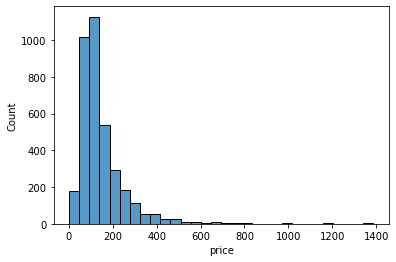

In [2172]:
sns.histplot(full_listings['price'], bins=30);

<AxesSubplot:xlabel='room_type', ylabel='price'>

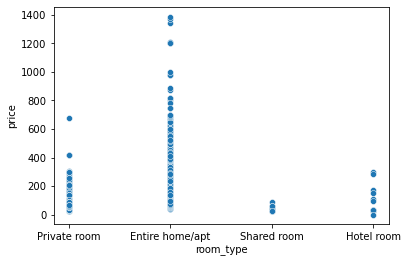

In [2173]:
sns.scatterplot( x= full_listings['room_type'], y = full_listings['price'] )

In [2174]:
full_listings = full_listings[full_listings['price']>0]

In [2175]:
full_listings['price'].describe()

count    3652.000000
mean      145.772453
std       112.817727
min        22.000000
25%        85.000000
50%       115.000000
75%       171.000000
max      1387.000000
Name: price, dtype: float64

In [2176]:
len(full_listings[full_listings['price']>700])

17

In [2177]:
full_listings[full_listings['price']>700]

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude_x,longitude_x,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,first_review,last_review,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store,popular,current_day,days_being_host,days_since_first_review,days_since_last_review
1912,8479494,Georgetown Mansion,BUSINESS or FAMILY RETREAT. Three level home w...,"Welcome Georgetown DC,",44658525,2015-09-20,NaN,within an hour,1.00,0.74,1,3.0,1,1,"Cathedral Heights, McLean Gardens, Glover Park",38.92378,-77.07360,Entire home/apt,16,6.0,7.0,10.0,"[""Cable TV"", ""Shampoo"", ""TV with standard cabl...",1343.0,1,7,1,2,7,7,1.3,7.0,t,22,43,67,307,2015-10-13,2021-06-13,f,2,2,0,0,5,0,0,1,4,17,48,27,44,24,2,0,2021-07-11,2121 days,2098 days,28 days
1913,9975625,Family/Business Retreat Home,Brand new house located near National Cathedra...,NaN,44658525,2015-09-20,NaN,within an hour,1.00,0.74,1,3.0,1,1,"Cathedral Heights, McLean Gardens, Glover Park",38.92507,-77.07374,Entire home/apt,12,4.0,5.0,7.0,"[""Cable TV"", ""First aid kit"", ""Shampoo"", ""TV w...",1200.0,1,1125,1,2,1125,1125,1.3,1125.0,t,22,41,65,299,2016-11-12,2021-06-21,f,2,2,0,0,5,0,0,1,4,17,48,27,44,24,2,0,2021-07-11,2121 days,1702 days,20 days
5352,15060731,New House on Capitol Hill- Free Parking Permit,This newly rebuilt town house is in Capitol Hi...,Capitol Hill is a historic district. It is als...,95221142,2016-09-15,I have lived in Washington DC for more than 30...,within an hour,1.00,0.89,1,2.0,1,1,"Capitol Hill, Lincoln Park",38.88704,-76.99953,Entire home/apt,12,4.0,5.0,7.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",800.0,2,1125,2,2,1125,1125,2.0,1125.0,t,18,48,69,69,2017-03-09,2021-07-09,f,2,2,0,0,8,6,2,0,9,13,50,49,46,49,23,0,2021-07-11,1760 days,1585 days,2 days
1921,15999394,Townhouse/GloverPark-UpperGeorgetown/11slp/par...,You’ll love our place because of Glover Park i...,The house is ideally situated in NW and close ...,12159102,2014-02-11,NaN,within a few hours,0.90,0.67,0,2.0,1,1,"Cathedral Heights, McLean Gardens, Glover Park",38.92215,-77.07398,Entire home/apt,11,2.5,5.0,6.0,"[""Cooking basics"", ""First aid kit"", ""Lockbox"",...",980.0,3,28,3,3,28,28,3.0,28.0,t,0,14,37,130,2019-05-27,2020-11-23,f,2,2,0,0,5,0,0,1,4,17,48,27,44,24,2,0,2021-07-11,2707 days,776 days,230 days
7485,16019820,"Gorgeous Cape Cod, Heated Pool, Hot Tub, Parking",Beautiful cape cod house in sought after DC ne...,Friendship heights metro and chevy Chase circle,10676734,2013-12-17,Originally from the Midwest and have called DC...,within an hour,1.00,0.31,0,2.0,1,1,"Hawthorne, Barnaby Woods, Chevy Chase",38.97290,-77.06807,Entire home/apt,12,4.5,5.0,7.0,"[""Window guards"", ""Baby safety gates"", ""Babysi...",1369.0,2,1125,2,4,1125,1125,2.2,1125.0,t,22,48,78,353,2017-04-02,2020-09-07,f,1,1,0,0,2,0,0,1,1,2,24,4,21,2,6,0,2021-07-11,2763 days,1561 days,307 days
6710,16620442,"Georgetown House ,Renovated, Open Plan","In Georgetown, was recently renovated with a l...","Founded in 1791 Georgetown, is home to many US...",109736004,2017-01-03,NaN,within a day,0.70,0.35,0,1.0,1,1,"Georgetown, Burleith/Hillandale",38.90987,-77.05751,Entire home/apt,6,2.5,2.0,2.0,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",750.0,3,28,3,3,28,28,3.0,28.0,t

In [2178]:
len(full_listings[full_listings['price']<40])

112

In [2179]:
full_listings[full_listings['price']<40]

,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude_x,longitude_x,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,first_review,last_review,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,historic site,museum,metro,music venue,perfomring arts venue,college and university,food,nightlife spot,outdoors and recreation,government building,clothing store,popular,current_day,days_being_host,days_since_first_review,days_since_last_review
4340,841234,"Lovely room on 2nd street, nw dc",This offer is unbelievable!!! because it is lo...,"It’s a quiet, friendly and safe neighborhood f...",315148,2010-12-10,"My name is John and I am from Washington DC, I...",within a day,0.79,0.57,0,64.0,1,1,"Howard University, Le Droit Park, Cardozo/Shaw",38.91767,-77.01549,Private room,1,1.0,1.0,1.0,"[""First aid kit"", ""Long term stays allowed"", ""...",35.0,28,365,28,28,365,365,28.0,365.0,t,10,40,70,345,2016-10-21,2021-05-26,f,32,0,31,1,18,10,2,23,37,49,50,50,46,36,46,0,2021-07-11,3866 days,1724 days,46 days
4629,841260,Metro Style Living in Washington DC,Metro Style Living in Washington DC<br /><br /...,Its a very safe neighborhood and the house is ...,315148,2010-12-10,"My name is John and I am from Washington DC, I...",within a day,0.79,0.57,0,64.0,1,1,"Brightwood Park, Crestwood, Petworth",38.93719,-77.02335,Private room,1,2.0,1.0,1.0,"[""Dedicated workspace"", ""Long term stays allow...",39.0,28,360,28,28,360,360,28.0,360.0,t,10,40,70,345,2016-04-01,2021-04-24,f,32,0,31,1,1,1,1,3,5,8,48,15,47,10,10,0,2021-07-11,3866 days,1927 days,78 days
4341,860776,Gorgeous cozy room available in the heart of DC,This offer is unbelievable!!! because it is lo...,"It’s a quiet, friendly and safe neighborhood f...",315148,2010-12-10,"My name is John and I am from Washington DC, I...",within a day,0.79,0.57,0,64.0,1,1,"Howard University, Le Droit Park, Cardozo/Shaw",38.91785,-77.01498,Private room,1,3.0,1.0,1.0,"[""Dedicated workspace"", ""Long term stays allow...",28.0,28,365,28,28,365,365,28.0,365.0,t,8,38,68,343,2020-07-07,2020-12-31,f,32,0,31,1,18,10,2,23,37,49,50,50,46,36,46,0,2021-07-11,3866 days,369 days,192 days
4630,887461,Cozy room right next to the petworth metro sta...,Cozy room right next to the petworth metro sta...,Its a very safe neighborhood and the house is ...,315148,2010-12-10,"My name is John and I am from Washington DC, I...",within a day,0.79,0.57,0,64.0,1,1,"Brightwood Park, Crestwood, Petworth",38.93788,-77.02313,Private room,1,2.0,1.0,1.0,"[""Dedicated workspace"", ""Long term stays allow...",39.0,28,365,28,28,365,365,28.0,365.0,t,0,0,0,275,2015-07-02,2021-03-29,f,32,0,31,1,1,1,1,3,5,8,48,15,47,10,10,0,2021-07-11,3866 days,2201 days,104 days
2007,888029,PERFECT ROOM FOR INTERNS OR STUDENTS,Metro Style Living in Washington DC<br /><br /...,Its a very safe neighborhood and the house is ...,315148,2010-12-10,"My name is John and I am from Washington DC, I...",within a day,0.79,0.57,0,64.0,1,1,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.93664,-77.02298,Private room,1,2.0,1.0,1.0,"[""Dedicated workspace"", ""Long term stays allow...",35.0,28,365,28,28,365,365,28.0,365.0,t,0,0,0,205,2014-12-20,2020-10-16,f,32,0,31,1,7,2,3,22,23,50,50,50,46,39,29,0,2021-07-11,3866 days,2395 days,268 days
6517,1838623,Furnished Rm South of Takoma D.C.,Furnished room in charming 3 bed/2 bath home. ...,"Quiet, residential neighborhood near downtown ...",9542055,2013-10-2

For price, only one outlier was removed but the rest were studied and seem legitimate. The price column was also changed to a float. 

In [2181]:
full_listings['minimum_nights'].describe()

count    3652.000000
mean        6.321742
std        16.436035
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       365.000000
Name: minimum_nights, dtype: float64

In [2182]:
full_listings['maximum_nights'].describe()

count    3.652000e+03
mean     3.077317e+04
std      1.662955e+06
min      2.000000e+00
25%      6.000000e+01
50%      1.125000e+03
75%      1.125000e+03
max      1.000000e+08
Name: maximum_nights, dtype: float64

In [2183]:
full_listings['minimum_minimum_nights'].describe()

count    3652.000000
mean        6.151698
std        22.411174
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       730.000000
Name: minimum_minimum_nights, dtype: float64

In [2184]:
full_listings['maximum_minimum_nights'].describe()

count    3652.000000
mean       10.496988
std        53.347984
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max       730.000000
Name: maximum_minimum_nights, dtype: float64

In [2185]:
full_listings['minimum_maximum_nights'].describe()

count    3.652000e+03
mean     3.101780e+04
std      1.662950e+06
min      1.000000e+00
25%      1.125000e+03
50%      1.125000e+03
75%      1.125000e+03
max      1.000000e+08
Name: minimum_maximum_nights, dtype: float64

In [2186]:
full_listings['maximum_maximum_nights'].describe()

count    3.652000e+03
mean     1.120358e+07
std      1.545208e+08
min      3.000000e+00
25%      1.125000e+03
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_maximum_nights, dtype: float64

In [2187]:
full_listings['minimum_nights_avg_ntm'].describe()

count    3652.000000
mean        9.814732
std        51.745953
min         1.000000
25%         1.400000
50%         2.000000
75%         3.900000
max       730.000000
Name: minimum_nights_avg_ntm, dtype: float64

In [2188]:
full_listings['maximum_nights_avg_ntm'].describe()

count    3.652000e+03
mean     1.117789e+07
std      1.541656e+08
min      3.000000e+00
25%      1.125000e+03
50%      1.125000e+03
75%      1.125000e+03
max      2.142547e+09
Name: maximum_nights_avg_ntm, dtype: float64

In [2189]:
full_listings.drop(columns= ['maximum_maximum_nights', 'minimum_maximum_nights', 
                             'maximum_minimum_nights', 'minimum_minimum_nights',
                             'has_availability', 'current_day',
                            'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                             'calculated_host_listings_count_shared_rooms', 'host_since',
                             'first_review', 'last_review', 'host_total_listings_count'
                            ]
                   , inplace=True)

Above, I dropped unnecessary and repetitive columns from the dataset. Below, I will explore the last remaining features.

In [2190]:
full_listings['availability_30'].describe()

count    3652.000000
mean        9.283954
std         9.673873
min         0.000000
25%         0.000000
50%         6.000000
75%        16.000000
max        30.000000
Name: availability_30, dtype: float64

In [2191]:
full_listings['availability_60'].describe()

count    3652.000000
mean       25.694140
std        19.297136
min         0.000000
25%         8.000000
50%        24.000000
75%        40.000000
max        60.000000
Name: availability_60, dtype: float64

In [2192]:
full_listings['availability_90'].describe()

count    3652.000000
mean       44.271084
std        29.309247
min         0.000000
25%        18.000000
50%        47.000000
75%        69.000000
max        90.000000
Name: availability_90, dtype: float64

In [2193]:
full_listings['availability_365'].describe()

count    3652.000000
mean      169.473439
std       124.564227
min         0.000000
25%        56.000000
50%       152.000000
75%       304.000000
max       365.000000
Name: availability_365, dtype: float64

In [2194]:
full_listings['instant_bookable'].value_counts()

f    2152
t    1500
Name: instant_bookable, dtype: int64

In [2195]:
full_listings['instant_bookable'] = full_listings['instant_bookable'].map({'f': 0, 't':1})

In [2196]:
full_listings['calculated_host_listings_count'].describe()

count    3652.000000
mean       15.091731
std        37.667651
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       170.000000
Name: calculated_host_listings_count, dtype: float64

In [2197]:
full_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3652 entries, 0 to 824
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   id                              3652 non-null   int64          
 1   name                            3652 non-null   object         
 2   description                     3609 non-null   object         
 3   neighborhood_overview           2796 non-null   object         
 4   host_id                         3652 non-null   int64          
 5   host_about                      2538 non-null   object         
 6   host_response_time              3652 non-null   object         
 7   host_response_rate              3652 non-null   float64        
 8   host_acceptance_rate            3652 non-null   float64        
 9   host_is_superhost               3652 non-null   int64          
 10  host_has_profile_pic            3652 non-null   int64        

In [2198]:
full_listings.shape

(3652, 47)

This is the final numerical data that has been cleaned and I will export. I will some more text analysis on a few fields before starting on modeling. 

In [2202]:
full_listings.reset_index(inplace=True)

In [2203]:
full_listings.to_csv('../data/cleaned_numerical_df.csv')

Just a final note here that if time allows, all of the cleaning steps above could be put into a function and run on new incoming data each month to have the most up to date dc market data. 